In [7]:
from aiida import load_dbenv, is_dbenv_loaded
if not is_dbenv_loaded():
    load_dbenv()
from aiida.orm import load_node
from IPython.display import Image
import markdown

In [1]:
def generate_graph(pk):
    !verdi graph generate {pk}
    !dot -Tpng {pk}.dot -o {pk}.png
    return "{}.png".format(pk)

#### Get the list of executed calculations

In [2]:
!verdi calculation list -a

# Last daemon state_updater check: 0h:00m:12s ago (at 18:43:33 on 2017-04-20)
  PK  State             Creation    Sched. state    Computer    Type
----  ----------------  ----------  --------------  ----------  ------------------
4685  FINISHED          328D ago    DONE            localhost   quantumespresso.pw
4694  FAILED            328D ago                    localhost   quantumespresso.pw
4698  FAILED            328D ago                    localhost   quantumespresso.pw
4702  FINISHED          328D ago    DONE            localhost   quantumespresso.pw
4708  SUBMISSIONFAILED  317D ago                    localhost   quantumespresso.pw
4709  FAILED            317D ago    DONE            localhost   quantumespresso.pw
4714  FINISHED          317D ago    DONE            localhost   quantumespresso.pw
4723  FINISHED          310D ago    DONE            localhost   quantumespresso.pw
4731  FINISHED          309D ago    DONE            localhost   quantumespresso.pw
4811  FAILED           

#### Generate the graph for a calculation

In [3]:
generate_graph(4811)

out_file_name  4811.dot


'4811.png'

#### Show the generated graph

In [4]:
from IPython.display import Image

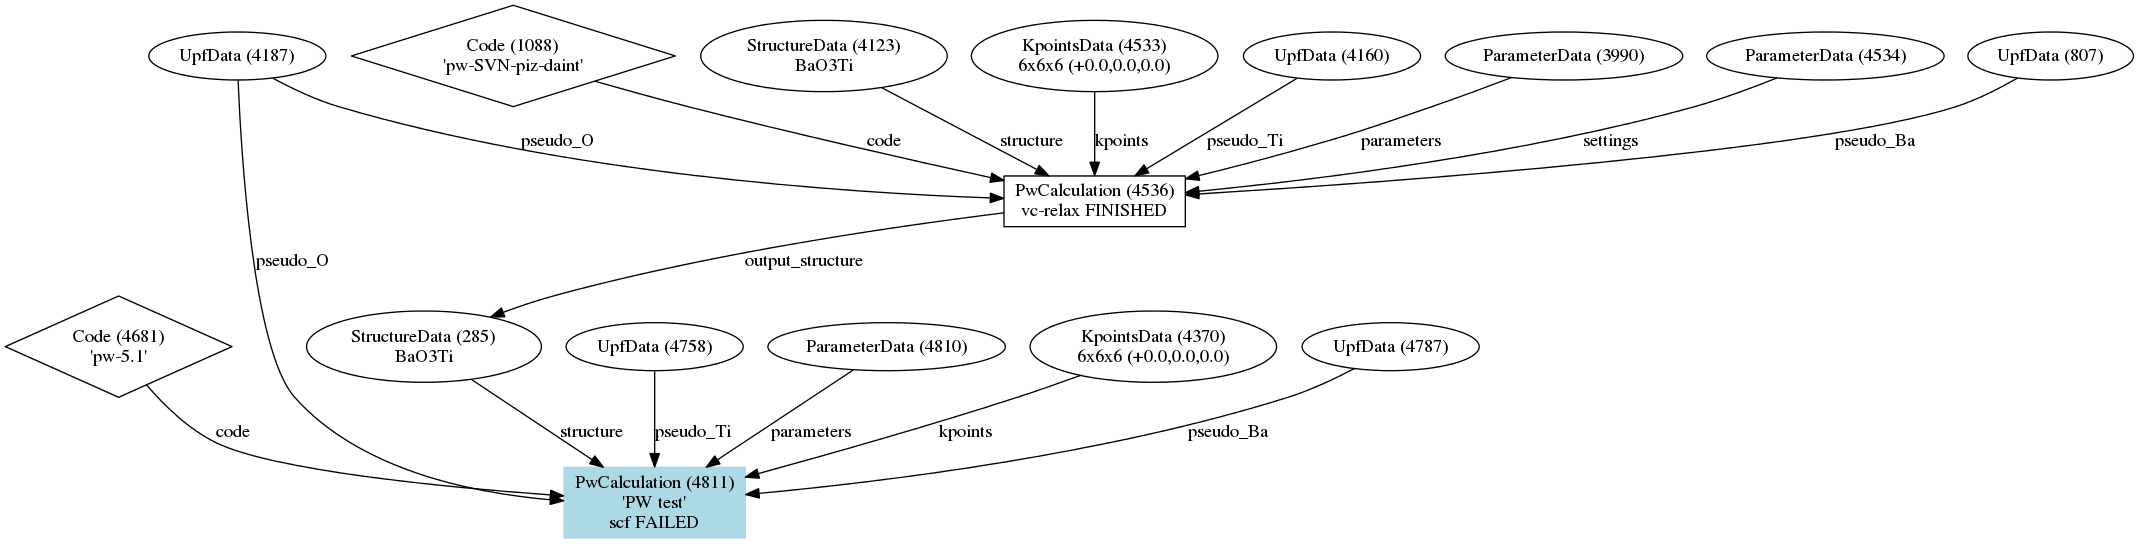

In [5]:
Image(filename='4811.png')

#### Load the node of the calculation and print its inputs

In [8]:
calc = load_node(4811)
calc.get_inputs(also_labels=True)

[(u'code',
  <Code: Remote code 'pw-5.1' on localhost, pk: 4681, uuid: f1227d49-4863-4741-b8d9-b7293f88580c>),
 (u'pseudo_O',
  <UpfData: uuid: 3b18ca52-8fdf-41f0-bd6d-f70bb395b8e5 (pk: 4187)>),
 (u'pseudo_Ti',
  <UpfData: uuid: c9c75827-202e-447b-ac28-3a6ae843f26e (pk: 4758)>),
 (u'parameters',
  <ParameterData: uuid: 0f5e3751-58e6-4c7e-97bd-cc4edf48725d (pk: 4810)>),
 (u'kpoints',
  <KpointsData: uuid: 1a722607-3c36-493b-9ed6-5dc91f49f4f1 (pk: 4370)>),
 (u'pseudo_Ba',
  <UpfData: uuid: 4e86f197-0de2-4676-976f-67f76a2d527a (pk: 4787)>),
 (u'structure',
  <StructureData: uuid: 3a4b1270-82bf-4d66-a51f-982294f6e1b3 (pk: 285)>)]

#### Get the input structure of the calculation

In [9]:
structure = calc.inp.structure

#### Generate and show the graph of this input structure

out_file_name  285.dot


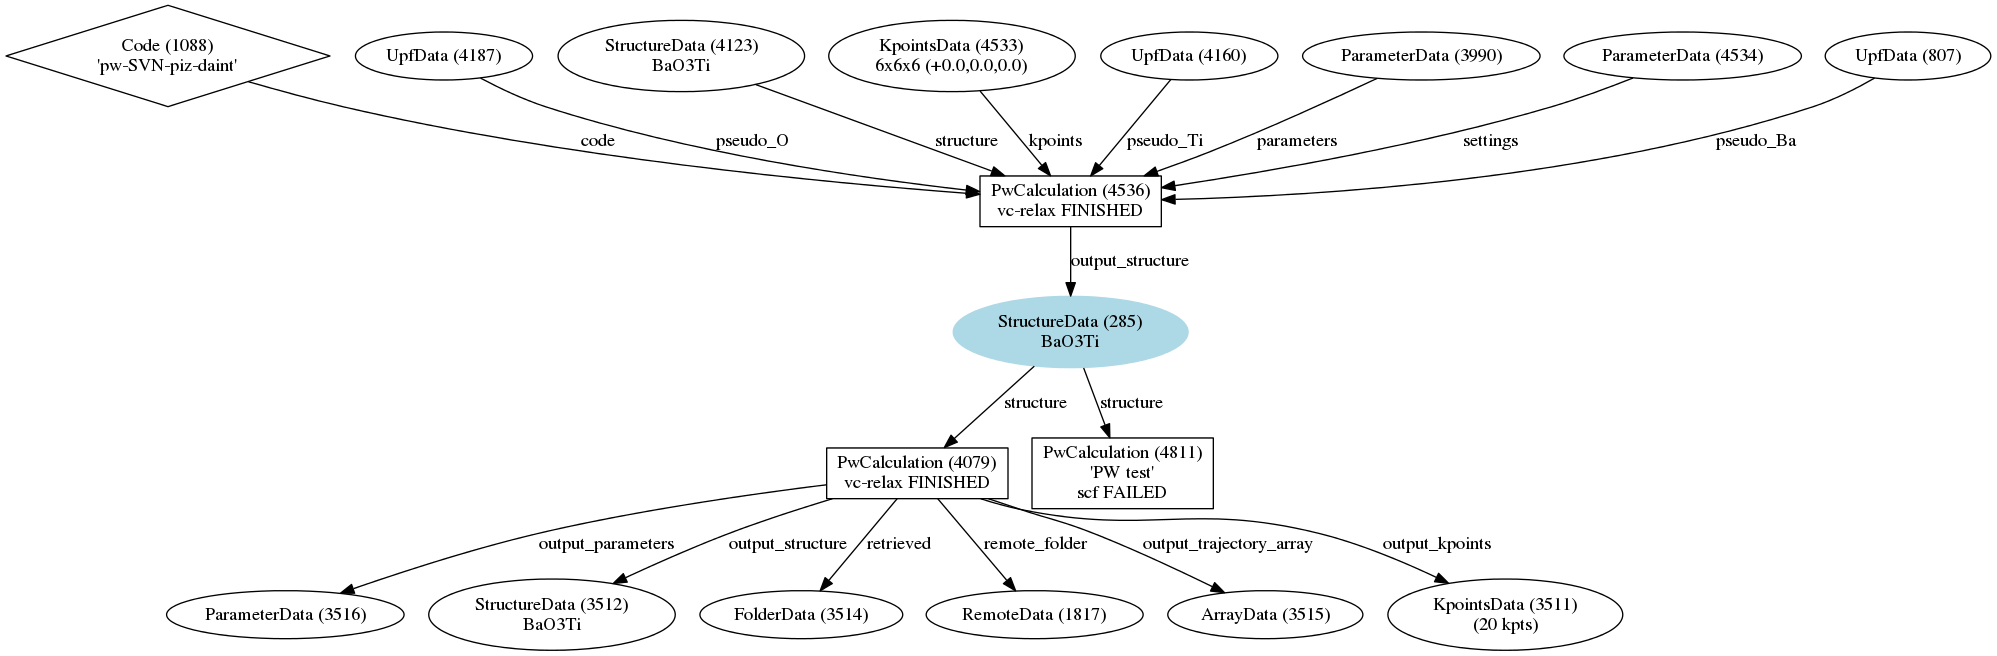

In [11]:
generate_graph(structure.pk)
Image(filename=str(structure.pk)+'.png')

#### Show the inputs of the structure

In [12]:
structure.get_inputs(also_labels=True)

[(u'output_structure',
  <PwCalculation: uuid: 0a1a8946-c933-480c-b03c-88322c1850c8 (pk: 4536)>)]

#### List all the available structures

In [13]:
!verdi data structure list

ID	formula	label
4684	Si2	
4688	Si2	
4693	Si2	
4697	Si2	
4701	Si2	
4705	Si2	
4712	Si2	
4717	Si2	
4721	Si2	
4729	Si2	
4814	Si2	
4819	C2	
4826	C2	
4837	C2	
4847	C2	
4857	C2	
4867	C2	
4879	C2	
4886	C2	
4897	C2	
4907	C2	
4917	C2	
4927	C2	
4936	C16	
4937	C16	
4938	C16	
4947	AuMg	
4951	C2	
4958	C2	
4969	C2	
4979	C2	
4989	C2	
4999	C2	
5008	C16	
5017	C16	
5019	C16	
5028	C16	
5037	C16	


#### Generate the graph of an arbitrary structure and display it

out_file_name  4684.dot


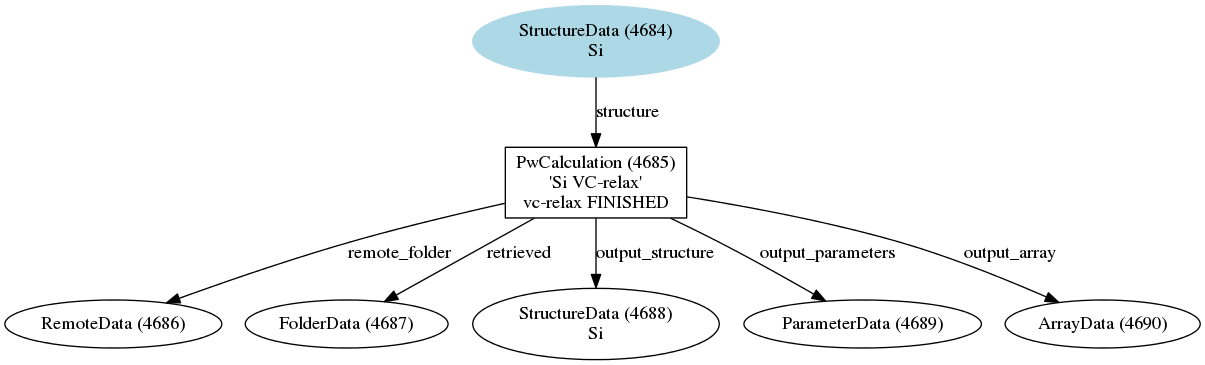

In [14]:
generate_graph(4684)
Image(filename='4684.png')

#### Load the calculation that has this structure as input and show its output parameters

In [17]:
calc = load_node(4685)
calc.out.output_parameters.get_dict()

{u'energy': -261.853040321525,
 u'energy_accuracy': 7.211016614409e-09,
 u'energy_accuracy_units': u'eV',
 u'energy_units': u'eV',
 u'fermi_energy': 6.15670461331551,
 u'fermi_energy_units': u'eV',
 u'forces_units': u'ev / angstrom',
 u'number_of_atoms': 2,
 u'number_of_bands': 4,
 u'number_of_species': 1,
 u'parser_info': u'AiiDA QE Basic Parser v0.1',
 u'parser_warnings': [],
 u'stress': [[-0.038541524152872, 0.0, 0.0],
  [0.0, -0.038541524152872, 0.0],
  [0.0, 0.0, -0.038541524152872]],
 u'stress_units': u'GPascal',
 u'total_force': 0.0,
 u'total_force_units': u'ev / angstrom',
 u'volume': 40.0257569737036,
 u'warnings': [],
 u'xml_warnings': []}

#### You can also quickly display the graph from the command line if you only have a terminal

In [18]:
!verdi work tree 4685


                       /-RemoteData [4686]
                      |
                      |--FolderData [4687]
                      |
-- /PwCalculation [4685]-StructureData [4688]
                      |
                      |--ParameterData [4689]
                      |
                       \-ArrayData [4690]
